In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

There are N bins and we throw N balls into them, one by one. Comparison of 4 different strategies for bin selection.

Strategy 1: Select one of the N bins uniformly at random and place the current ball into it.

In [3]:
def strategy1(N):
    bins = np.zeros(N)
    for i in xrange(N):
        randBin = np.random.randint(low = 0, high=N, size=1)
        bins[randBin] += 1
    return max(bins)

Strategy 2: Select 2 of the N bins uniformly at random without replacement and look at how many balls are already in each. If one bin has strictly fewer than the other, place the current ball in that bin. If both bins have the same number of balls, pick one of the two at random and place the current ball in it.

In [29]:
def strategy2(N):
    bins = np.zeros(N)
    for i in xrange(N):
        rand2 = np.random.randint(low = 0, high = N, size = 2)
        if bins[rand2[0]] < bins[rand2[1]]:
            bins[rand2[0]] += 1
        elif bins[rand2[0]] > bins[rand2[1]]:
            bins[rand2[1]] += 1
        else:
            randBin = np.random.choice(rand2)
            bins[randBin] += 1
    return max(bins)

Strategy 3: Same as strategy 2 except choose 3 bins at random instead of two.

In [45]:
def strategy3(N):
    bins = np.zeros(N)
    for i in xrange(N):
        rand3 = np.random.randint(low = 0, high = N, size = 3) #choose 3 random bins
        binsRand3 = bins[rand3] #get count of balls in those 3 bins
        minBin = rand3[np.argmin(binsRand3)]
        bins[minBin] += 1
    return max(bins)

Strategy 4: First bin is selected from the first N/2 bins and the second uniformly from the last N/2 with N assumed to be even. If one bin has strictly fewer balls than the other, place the current ball in that bin. If both have the same number of balls, place the current ball (deterministically) in the first of the two bins.

In [48]:
def strategy4(N):
    bins = np.zeros(N)
    for i in xrange(N):
        bin1 = np.random.randint(low = 0, high=N/2, size = 1)
        bin2 = np.random.randint(low=N/2 + 1, high = N, size=1)
        if bins[bin1] < bins[bin2]:
            bins[bin1] += 1
        elif bins[bin2] < bins[bin1]:
            bins[bin2] += 1
        else:
            bins[bin1] += 1
    return max(bins)

In [19]:
def multiTrials(trials, N, strategy):
    results = [int(strategy(N)) for _ in range(trials)]
    plt.hist(results)
    plt.xlabel("Maximum in bin")
    plt.ylabel("Count")

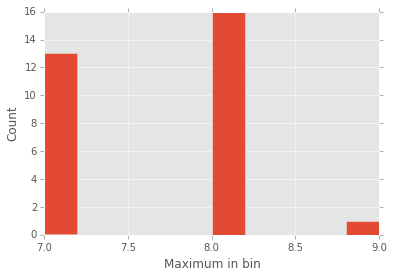

In [21]:
multiTrials(30, 100000, strategy1)

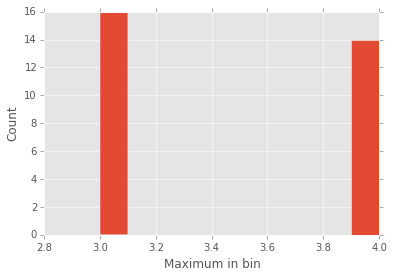

In [38]:
multiTrials(30, 100000, strategy2)

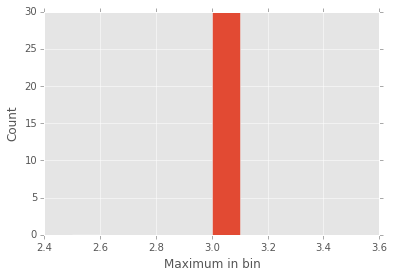

In [47]:
multiTrials(30, 100000, strategy3)

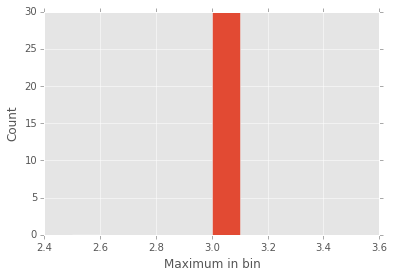

In [50]:
multiTrials(30, 100000, strategy4)

Strategies 3 and 4 appear to perform the best with both consistently getting a maximum of 3. Strategy 2 also gets a maximum of 3 but sometimes only achieves a maximum of 4. The first strategy performs less well with a range of results from 7 to 9 with 8 being the most common result. All run for 30 trials with N = 100,000.